In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
clinical_iu = pd.read_csv("../../Data/clinical_IUCPQ.csv")
IHC_iu = pd.read_csv("../../Data/IHC_IUCPQ.csv")
radio_iu = pd.read_csv("../../Data/PyRads_IUCPQ.csv")

In [3]:
ihc_cols = list(IHC_iu.columns)
ihc_cols.remove("oncotech_id")
total_list = []
stroma_list = []
tumor_list = []
for item in ihc_cols:
    if item.endswith("total"):
        total_list.append(item)
    elif item.endswith("stroma"):
        stroma_list.append(item)
    elif item.endswith("tumeur"):
        tumor_list.append(item)
total_list_pred = total_list + ["pdl1_tps"] 
stroma_list_pred = stroma_list + ["pdl1_tps"] 
tumor_list_pred = tumor_list + ["pdl1_tps"] 

In [15]:
print("Clinical patients before cleaning: ", len(clinical_iu))
# remove patients which don't have pdl1_tps
clinical_iu = clinical_iu[~clinical_iu.pdl1_tps.isna()]
print("Clinical patients after removal of pdl1_tps nans: ", len(clinical_iu))
clinical_iu = clinical_iu.dropna(axis=1, how="all")

print("IHC patients IUCPQ beginning: ", len(IHC_iu))
IHC_iu = IHC_iu.dropna(axis=0)
print("IHC patients IUCPQ who have values for all immuncells: ", len(IHC_iu))

clinical_ihc_iu = IHC_iu.merge(clinical_iu,on="oncotech_id", how="inner")
print("Patients for cleaned IHC and cleaned clinical IUCPQ after: ", len(clinical_ihc_iu))

Clinical patients before cleaning:  191
Clinical patients after removal of pdl1_tps nans:  191
IHC patients IUCPQ beginning:  59
IHC patients IUCPQ who have values for all immuncells:  59
Patients for cleaned IHC and cleaned clinical IUCPQ after:  51


In [5]:
print("pdl1 groups according to groups")
print("Patients in upper 50%: ", len(clinical_ihc_iu[~clinical_ihc_iu["pdl1_group"].isin(["<1%", "1-49%"])]))
print("Patients in lower 50%: ", len(clinical_ihc_iu[clinical_ihc_iu["pdl1_group"].isin(["<1%", "1-49%"])]))
clinical_ihc_iu["pdl1_groups_percent"] = "upper50"
clinical_ihc_iu["pdl1_groups_percent"][clinical_ihc_iu["pdl1_group"].isin(["<1%", "1-49%"])] = "lower50"

print("pdfl groups according to median split: ")
pdl1_median = clinical_ihc_iu["pdl1_tps"].median()
print("Patients smaller median: ", len(clinical_ihc_iu[clinical_ihc_iu["pdl1_tps"] < pdl1_median]))
print("Patients greater-equal median: ", len(clinical_ihc_iu[clinical_ihc_iu["pdl1_tps"] >= pdl1_median]))
clinical_ihc_iu["pdl1_groups_median"] = "upperMedian"
clinical_ihc_iu["pdl1_groups_median"][clinical_ihc_iu["pdl1_tps"] < pdl1_median] = "lowerMedian"

clin_ihc_rad_iu = clinical_ihc_iu.merge(radio_iu, on="oncotech_id", how="inner")
print("Patients for clinical, IHC and Radiation data: ",len(clin_ihc_rad_iu))

pdl1 groups according to groups
Patients in upper 50%:  36
Patients in lower 50%:  15
pdfl groups according to median split: 
Patients smaller median:  20
Patients greater-equal median:  31
Patients for clinical, IHC and Radiation data:  29


In [6]:
clin_ihc_rad_iu.corr()#.style.background_gradient(cmap='Blues')

/var/folders/km/l90xp47s19v3fplyb1b0bc480000gp/T/ipykernel_28710/3756690221.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clin_ihc_rad_iu.corr()#.style.background_gradient(cmap='Blues')


Unnamed: 0_x  CD3_tumeur  \
Unnamed: 0_x                                            1.000000   -0.276304   
CD3_tumeur                                             -0.276304    1.000000   
CD3_stroma                                              0.004852    0.582749   
CD4_tumeur                                             -0.081856    0.281214   
CD4_stroma                                             -0.147378    0.271393   
...                                                          ...         ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...     -0.019882   -0.034624   
wavelet.LLL_gldm_LowGrayLevelEmphasis                  -0.015331   -0.012952   
wavelet.LLL_gldm_SmallDependenceEmphasis               -0.026176   -0.009603   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...     -0.102468    0.543178   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...     -0.012892   -0.022531   

                                                    CD3_stroma  CD4_tumeur  \
Unnamed: 0_x                                          0.004852   -0.081856   
CD3_tumeur                                            0.582749    0.281214   
CD3_stroma                                            1.000000    0.265720   
CD4_tumeur                                            0.265720    1.000000   
CD4_stroma                                            0.141798    0.920740   
...                                                        ...         ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...    0.017873    0.220467   
wavelet.LLL_gldm_LowGrayLevelEmphasis                 0.026541    0.220497   
wavelet.LLL_gldm_SmallDependenceEmphasis              0.021491    0.094717   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...    0.282708    0.058452   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...    0.022926    0.215967   

                                                    CD4_stroma  CD8_tumeur  \
Unnamed: 0_x                                         -0.147378    0.031627   
CD3_tumeur                                            0.271393    0.587650   
CD3_stroma                                            0.141798    0.378651   
CD4_tumeur                                            0.920740    0.176807   
CD4_stroma                                            1.000000    0.105909   
...                                                        ...         ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...    0.231208   -0.085178   
wavelet.LLL_gldm_LowGrayLevelEmphasis                 0.225839   -0.065634   
wavelet.LLL_gldm_SmallDependenceEmphasis              0.040604   -0.151377   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...    0.092342    0.539321   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...    0.218110   -0.074976   

                                                    CD8_stroma  CD56_tumeur  \
Unnamed: 0_x                                         -0.126613     0.045753   
CD3_tumeur                                            0.560417     0.055663   
CD3_stroma                                            0.242258     0.161256   
CD4_tumeur                                            0.268912    -0.264980   
CD4_stroma                                            0.306453    -0.299072   
...                                                        ...          ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...   -0.033432    -0.117497   
wavelet.LLL_gldm_LowGrayLevelEmphasis                -0.007731    -0.113112   
wavelet.LLL_gldm_SmallDependenceEmphasis              0.045906    -0.158319   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...    0.649621     0.020421   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...   -0.016106    -0.113142   

                                                    CD56_stroma  CD163_tumeur  \
Unnamed: 0_x                                          -0.221171      0.086069   
CD3_tumeur                                             0.221095      0.488127   
CD3_stroma               

# IHC Correlations
## Total number

In [7]:
clin_ihc_rad_iu.pdl1_groups_median

0     upperMedian
1     upperMedian
2     lowerMedian
3     lowerMedian
4     upperMedian
5     upperMedian
6     lowerMedian
7     lowerMedian
8     lowerMedian
9     lowerMedian
10    lowerMedian
11    upperMedian
12    upperMedian
13    upperMedian
14    lowerMedian
15    upperMedian
16    upperMedian
17    lowerMedian
18    lowerMedian
19    upperMedian
20    upperMedian
21    upperMedian
22    upperMedian
23    upperMedian
24    upperMedian
25    upperMedian
26    lowerMedian
27    lowerMedian
28    lowerMedian
Name: pdl1_groups_median, dtype: object

In [8]:
clin_ihc_rad_iu_median_upper = clin_ihc_rad_iu[clin_ihc_rad_iu.pdl1_groups_median == "upperMedian"]
clin_ihc_rad_iu_median_under = clin_ihc_rad_iu[clin_ihc_rad_iu.pdl1_groups_median == "lowerMedian"]

Text(0.5, 1.0, 'Lower Median')

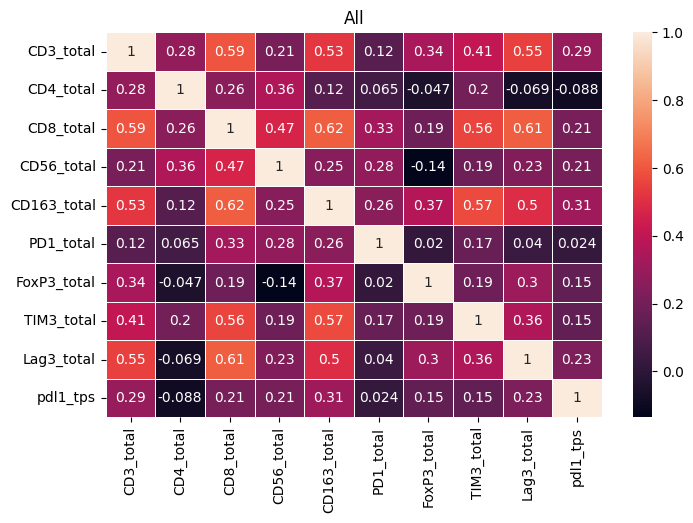

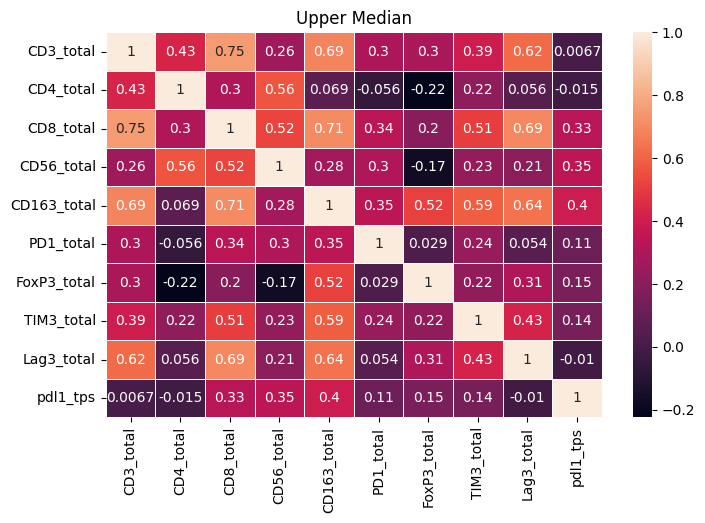

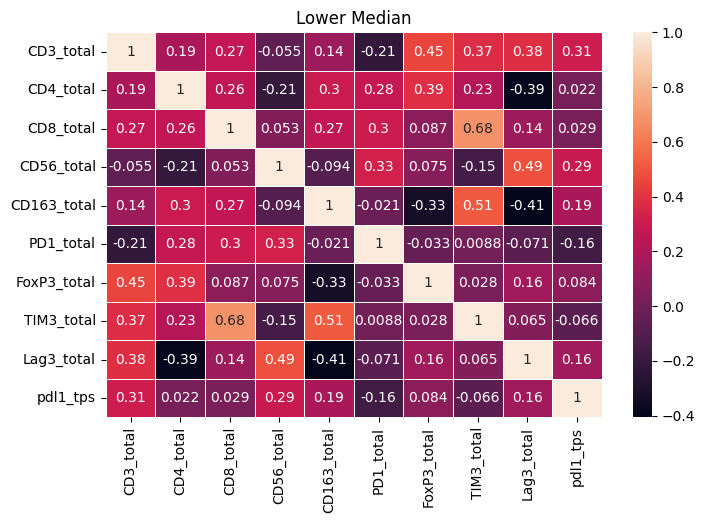

In [9]:
corr_ihc_total = clin_ihc_rad_iu[total_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total, annot=True, linewidths=.5, ax=ax)
ax.set_title('All')

corr_ihc_total_med_upper = clin_ihc_rad_iu_median_upper[total_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total_med_upper, annot=True, linewidths=.5, ax=ax)
ax.set_title('Upper Median')

corr_ihc_total_med_under = clin_ihc_rad_iu_median_under[total_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total_med_under, annot=True, linewidths=.5, ax=ax)
ax.set_title('Lower Median')

## Tumor number

Text(0.5, 1.0, 'Lower Median')

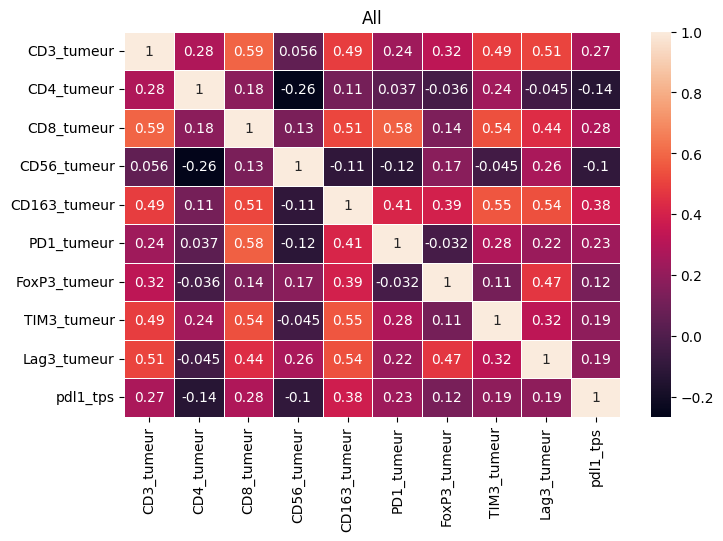

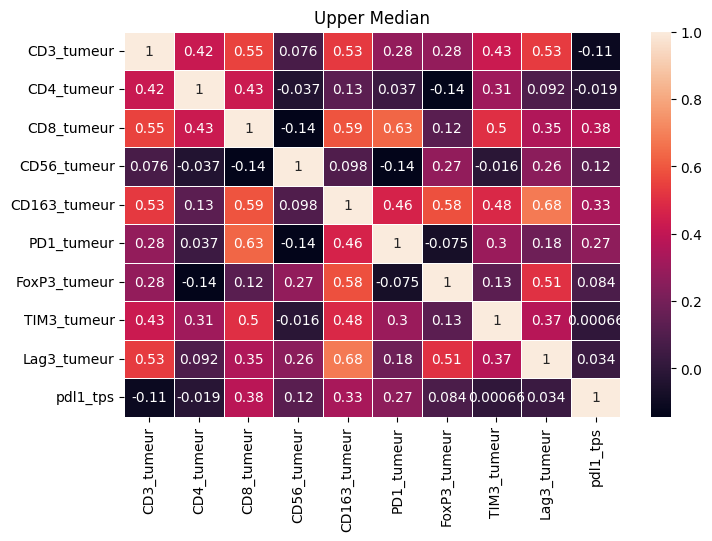

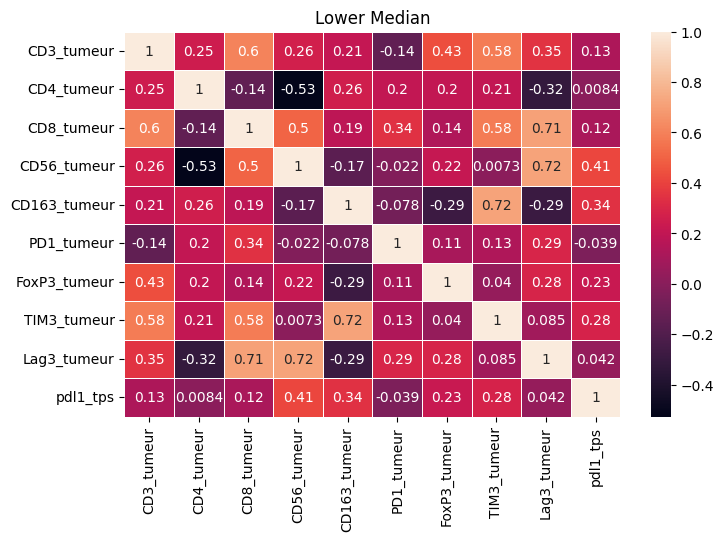

In [10]:
corr_ihc_tumor = clin_ihc_rad_iu[tumor_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_tumor, annot=True, linewidths=.5, ax=ax)
ax.set_title('All')

corr_ihc_total_med_upper = clin_ihc_rad_iu_median_upper[tumor_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total_med_upper, annot=True, linewidths=.5, ax=ax)
ax.set_title('Upper Median')

corr_ihc_total_med_under = clin_ihc_rad_iu_median_under[tumor_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total_med_under, annot=True, linewidths=.5, ax=ax)
ax.set_title('Lower Median')

## Stroma number

Text(0.5, 1.0, 'Lower Median')

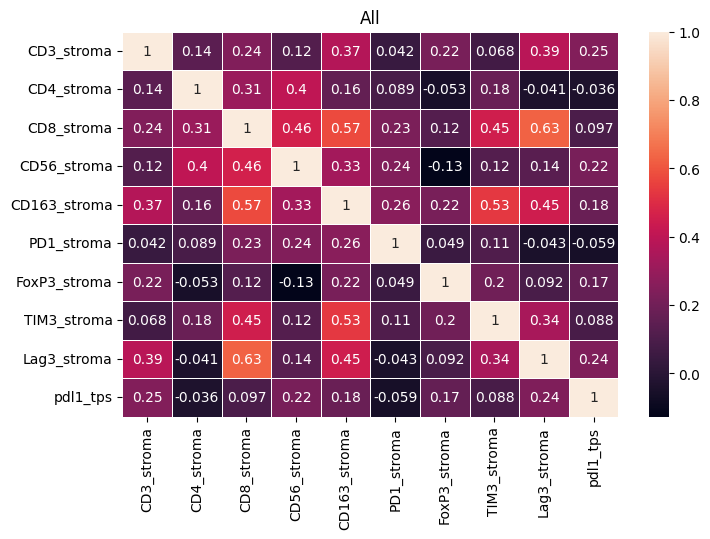

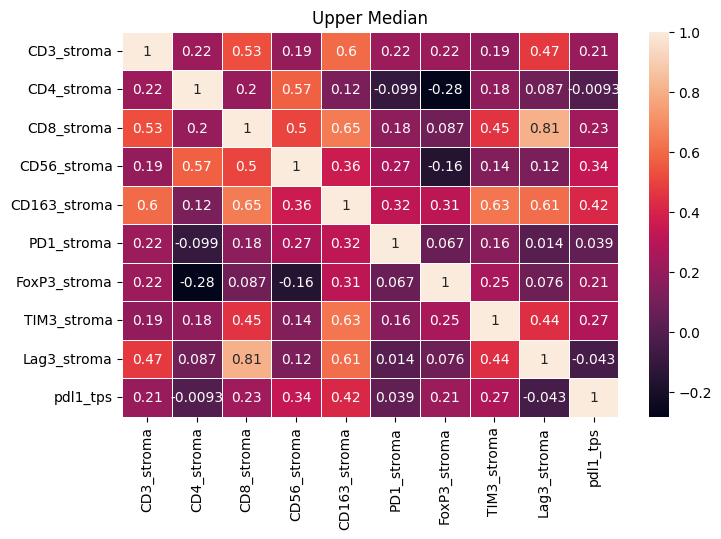

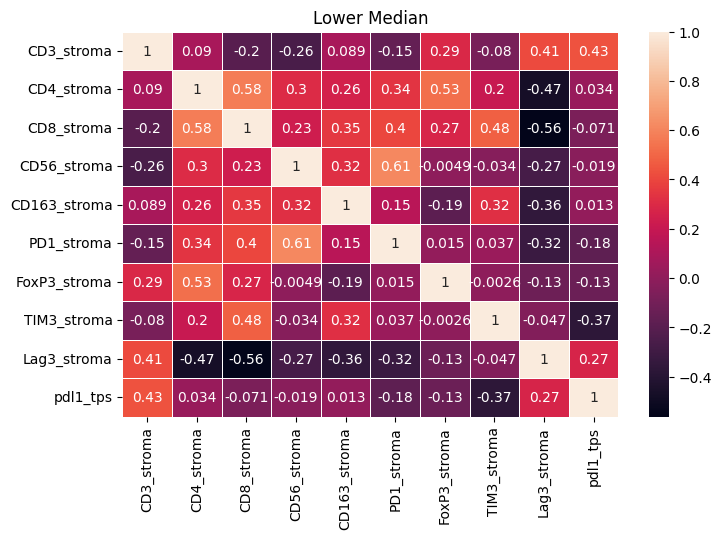

In [11]:
corr_ihc_stroma = clin_ihc_rad_iu[stroma_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_stroma, annot=True, linewidths=.5, ax=ax)
ax.set_title('All')

corr_ihc_total_med_upper = clin_ihc_rad_iu_median_upper[stroma_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total_med_upper, annot=True, linewidths=.5, ax=ax)
ax.set_title('Upper Median')

corr_ihc_total_med_under = clin_ihc_rad_iu_median_under[stroma_list_pred].corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_ihc_total_med_under, annot=True, linewidths=.5, ax=ax)
ax.set_title('Lower Median')

### Result
- CD163 Tumeur has the strongest correlation to pdl1_tps (0.38)

In [12]:
radio_iu_only = radio_iu.drop(columns=["Unnamed: 0", "oncotech_id"])
radio_iu_only.corr() #.min().min()

original_shape_Elongation  \
original_shape_Elongation                                            1.000000   
original_shape_Flatness                                              0.501664   
original_shape_LeastAxisLength                                       0.223169   
original_shape_MajorAxisLength                                       0.110403   
original_shape_Maximum2DDiameterColumn                               0.173663   
...                                                                       ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...                  -0.364872   
wavelet.LLL_gldm_LowGrayLevelEmphasis                               -0.550977   
wavelet.LLL_gldm_SmallDependenceEmphasis                            -0.485026   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...                   0.142898   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...                  -0.576545   

                                                    original_shape_Flatness  \
original_shape_Elongation                                          0.501664   
original_shape_Flatness                                            1.000000   
original_shape_LeastAxisLength                                     0.345354   
original_shape_MajorAxisLength                                     0.054581   
original_shape_Maximum2DDiameterColumn                             0.081800   
...                                                                     ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...                -0.232957   
wavelet.LLL_gldm_LowGrayLevelEmphasis                             -0.347945   
wavelet.LLL_gldm_SmallDependenceEmphasis                          -0.363584   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...                 0.178747   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...                -0.375115   

                                                    original_shape_LeastAxisLength  \
original_shape_Elongation                                                 0.223169   
original_shape_Flatness                                                   0.345354   
original_shape_LeastAxisLength                                            1.000000   
original_shape_MajorAxisLength                                            0.936023   
original_shape_Maximum2DDiameterColumn                                    0.933904   
...                                                                            ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...                       -0.142123   
wavelet.LLL_gldm_LowGrayLevelEmphasis                                    -0.256853   
wavelet.LLL_gldm_SmallDependenceEmphasis                                 -0.626467   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...                        0.418465   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...                       -0.262511   

                                                    original_shape_MajorAxisLength  \
original_shape_Elongation                                                 0.110403   
original_shape_Flatness                                                   0.054581   
original_shape_LeastAxisLength                                            0.936023   
original_shape_MajorAxisLength                                            1.000000   
original_shape_Maximum2DDiameterColumn                                    0.993040   
...                                                                            ...   
wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmp...                       -0.118233   
wavelet.LLL_gldm_LowGrayLevelEmphasis                                    -0.219105   
wavelet.LLL_gldm_SmallDependenceEmphasis                                 -0.578303   
wavelet.LLL_gldm_SmallDependenceHighGrayLevelEm...                        0.388025   
wavelet.LLL_gldm_SmallDependenceLowGrayLevelEmp...                       -0.219808   

                                                    original_sha

<AxesSubplot: >

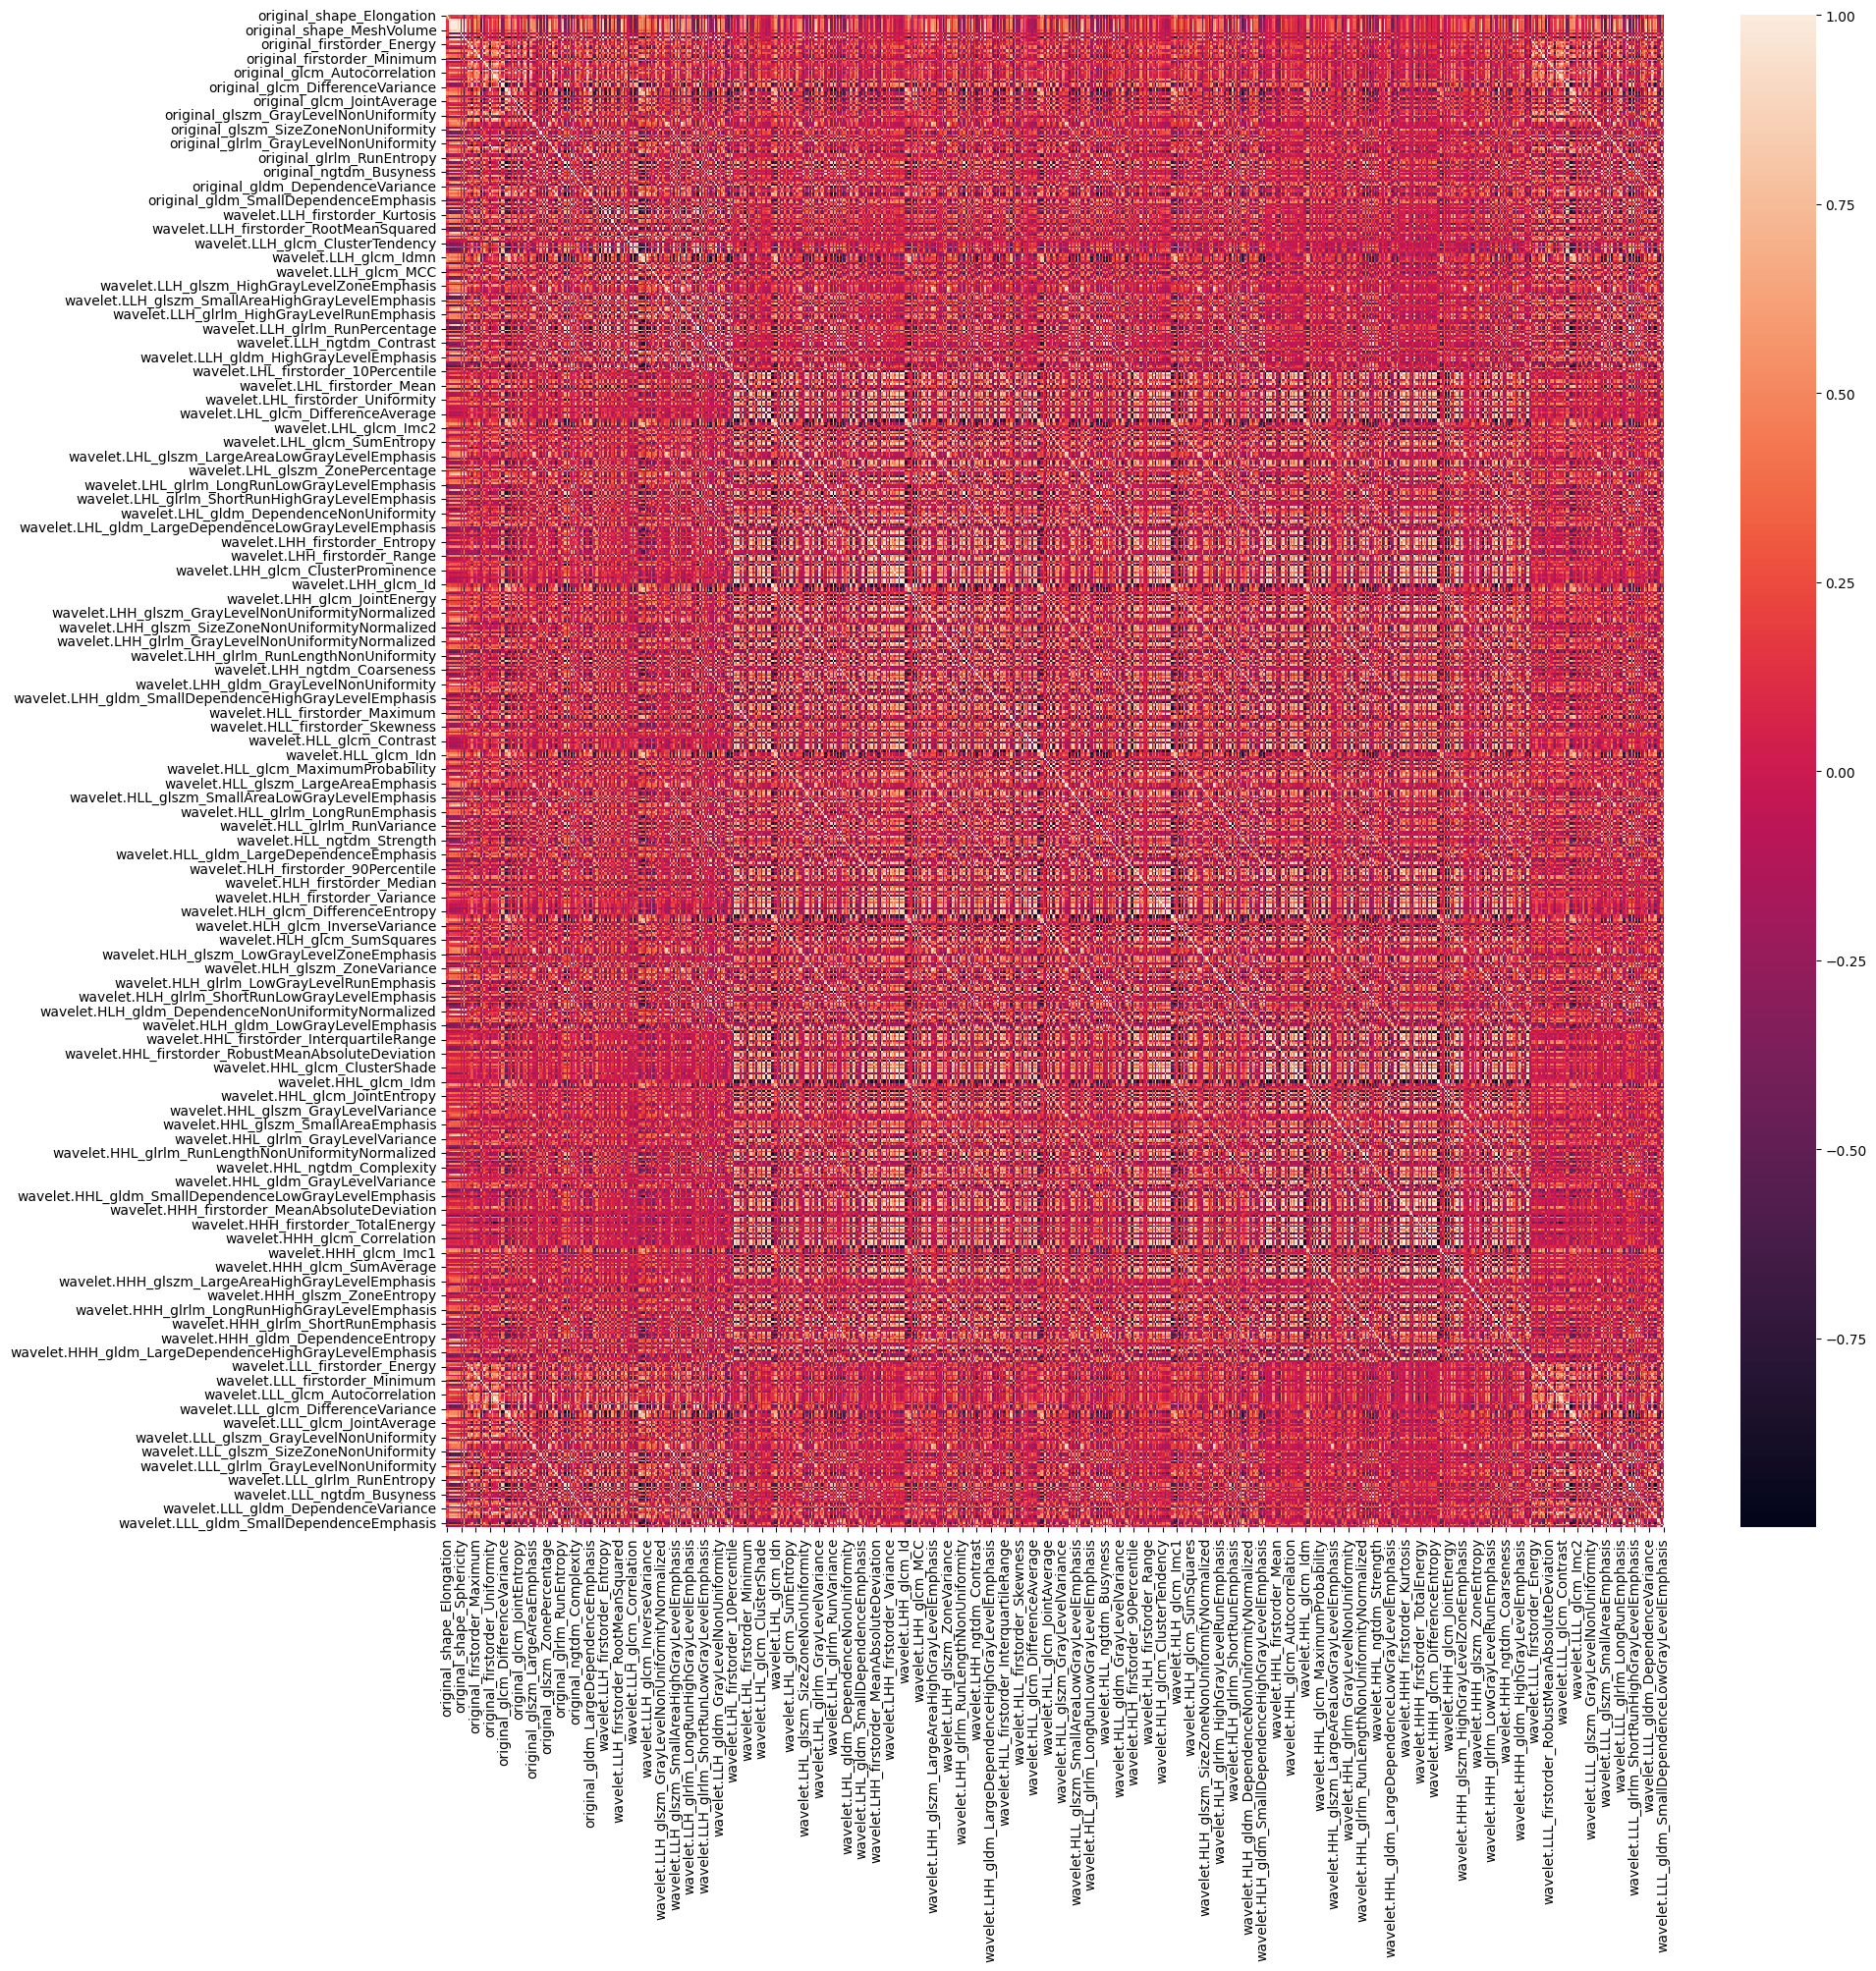

In [14]:

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(radio_iu_only.corr(), annot=False, ax=ax) # radio_iu_only.corr()
#ax.set_title(')